#기계학습론 실습 4과제
###로봇공학과 2016007038 변진욱

##3과제의 예측사항

각 feature를 비교했을 때 직선 회귀에 가장 적합한 것은 화면 크기임을 알 수 있다. 아이폰의 라인업에는 넘버링 이후 S가 붙는 모델에서 화면 크기가 커지는데, 이에 대한 반영이라고 생각한다. 

가격이 아닌 성능을 예측하는 것은 시각화로 나타내진 않았지만 히트맵에서 볼 수 있듯이 거의 일정한 수준으로 꾸준히 증가하는 것을 볼 수 있다. 프로세서의 성능이나 배터리 용량 같은 성능 정보는 충분히 예측할 수 있다고 생각한다.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

ip = pd.read_excel('./iPhone.xlsx')

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np


x= ip.drop('model', axis=1)
x= x[x['single_bench'].notnull()]
y_price= x['price']
x= x.drop('price', axis=1)
x_perf= x.drop('multi_bench', axis=1)
y_perf= x['multi_bench']

x_train, x_test, y_train, y_test = train_test_split(x, y_price, test_size = 0.2, random_state = 3)

구모델은 벤치마크 점수 정보가 없기 때문에 notnull을 이용하여 제외시킨다.


가격과 벤치마크 점수 두 가지의 label을 이용하기 위해 성능용 데이터 셋을 하나 더 만들었다.

In [22]:
reg_price = LinearRegression()
reg_price.fit(x_train, y_train)

pred_price = reg_price.predict(x_test)
rmse = (np.sqrt(mean_squared_error(y_test, pred_price)))
rmse

50.503562626189535

가격에 대한 예측의 RMSE값은 50&#36; 정도가 나왔다. <br>
같은 모델에서 스토리지 업그레이드된 모델이 100&#36;씩 차이나는 것을 볼 때 적어도 옵션 하나, 또는 세대 하나 정도의 구분을 할 수 있을 정도의 성능은 얻을 수 있다고 생각한다.

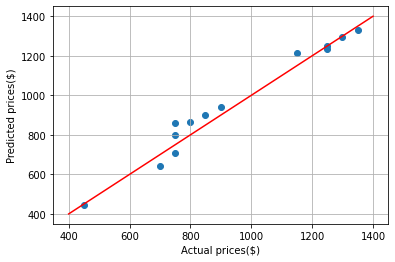

In [9]:
plt.scatter(y_test, pred_price)
plt.xlabel("Actual prices($)")
plt.ylabel("Predicted prices($)")
plt.plot([400,1400], [400,1400], 'r')
plt.grid()

실제 가격과 예상 가격의 그래프이다.

실제가격 750&#36; 부근에 3개의 점이 수직으로 나열된 것을 볼 수 있는데, 다음 세대로 넘어가면서 성능을 향상시키면서 가격을 그대로 유지한 모델의 경우라고 볼 수 있다.

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x_perf, y_perf, test_size = 0.2, random_state = 3)
reg_perf = LinearRegression()
reg_perf.fit(x_train, y_train)

pred_perf = reg_perf.predict(x_test)
rmse = (np.sqrt(mean_squared_error(y_test, pred_perf)))
rmse

94.18478327703522

벤치마크 점수에 대한 RMSE값은 94정도가 나왔다.

비교적 구모델인 아이폰6 이후로 벤치마크 점수가 다음 세대에서 100이상 차이나는 것으로 볼 때 가격에서와 비슷하게 세대를 구분할 수 있을 정도의 성능이라고 볼 수 있다.

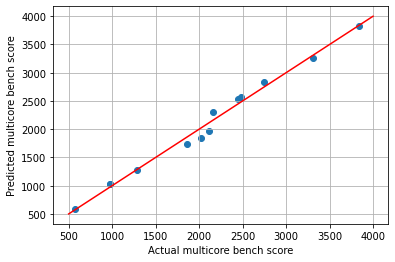

In [11]:
plt.scatter(y_test, pred_perf)
plt.xlabel("Actual multicore bench score")
plt.ylabel("Predicted multicore bench score")
plt.plot([500,4000], [500,4000], 'r')
plt.grid()

In [33]:
for i in range(10):
  x_train, x_test, y_train, y_test = train_test_split(x, y_price, test_size = 0.2, random_state = i)
  reg_price = LinearRegression()
  reg_price.fit(x_train, y_train)

  pred_price = reg_price.predict(x_test)
  rmse = (np.sqrt(mean_squared_error(y_test, pred_price)))

  x_train, x_test, y_train, y_test = train_test_split(x_perf, y_perf, test_size = 0.2, random_state = i)
  reg_perf = LinearRegression()
  reg_perf.fit(x_train, y_train)

  pred_perf = reg_perf.predict(x_test)
  rmse_perf = (np.sqrt(mean_squared_error(y_test, pred_perf)))
  rmse_perf
  print('RMSE of price : ', rmse, ', RMSE of bench score : ', rmse_perf)

RMSE of price :  56.306973252836215 , RMSE of bench score :  100.47157445752937
RMSE of price :  53.26964275633184 , RMSE of bench score :  96.41414727837717
RMSE of price :  67.39929985792389 , RMSE of bench score :  130.18388083695012
RMSE of price :  50.503562626189535 , RMSE of bench score :  94.18478327703522
RMSE of price :  37.76005531020614 , RMSE of bench score :  96.50643727270256
RMSE of price :  37.38859319135994 , RMSE of bench score :  94.27979994916447
RMSE of price :  53.56596716022186 , RMSE of bench score :  93.04366427607964
RMSE of price :  49.31123284058454 , RMSE of bench score :  101.91324213077698
RMSE of price :  52.35674760203869 , RMSE of bench score :  98.43548083540055
RMSE of price :  42.951512850617775 , RMSE of bench score :  102.08524176320489


random state를 변화시켜가며 살펴보면, 가격에 대한 RMSE값은 37&#36;~67&#36;로 나타나고, 

벤치마크 점수에 대한 RMSE값은 93~130 정도로 나타난다.

위의 Linear regression 모델에서는 random state값이 5일 때 2가지 label에서 오차가 적으므로 가장 성능이 좋은 모델이다.

<br><br><br><br>

위의 학습 모델을 이용하여 다음에 출시될 아이폰13과 이미 출시된 아이패드 모델 2가지의 성능과 가격을 예측해본다.

In [34]:
iphone13 = np.array([[2021, 1788, 6, 3, 4, 64, 3000, 180, 6.1, 1170, 2532, 12]])
iphone13_pred_perf = reg_perf.predict(iphone13)
iphone13_pred_perf

array([4498.14874426])

다음 세대에서 칩셋이 변하지 않는다고 가정하여 아이폰 12의 싱글코어 점수를 그대로 이용하면 멀티코어 벤치마크 점수는 4498이 나온다. 이는 현재 아이패드 프로의 점수와 비슷한 수준이며, 현재 아이폰의 점수 기준으로는 높다. OS에서 최적화를 충분히 한다면 도달할 수 있는 수치라고 생각한다.

In [40]:
iphone13 = np.array([[2021, 1788, 4498, 6, 3, 4, 64, 3000, 180, 6.1, 1170, 2532, 12]])
iphone13_pred_price = reg_price.predict(iphone13)
iphone13_pred_price

array([752.04354305])

예측한 멀티코어 점수를 대입하고 가격을 예측했을 때 752&#36;가 나왔다.<br>
 애플의 가격 정책을 살펴봤을 때 749&#36; 또는 799&#36;라고 예상되는데, 아이폰 12 64Gb 모델이 799$로 출시되었으므로 적당한 가격이라고 할 수 있다.

In [36]:
ipad8 = np.array([[2020, 1112, 6, 2.5, 3, 128, 3240, 490, 10.2, 1620, 2160, 8]]) #2397
ipad8_pred_perf = reg_perf.predict(ipad8)
ipad8_pred_perf

array([754.00150444])

In [41]:
ipad8 = np.array([[2020, 1112, 2397, 6, 2.5, 3, 128, 3240, 490, 10.2, 1620, 2160, 8]]) #559
ipad8_pred_price = reg_price.predict(ipad8)
ipad8_pred_price

array([1850.5495989])

반면, 아이패드 8세대의 정보를 그대로 넣었을 때에는 예측이 크게 빗나가는 것을 볼 수 있다.<br>
원래 2397인 멀티코어 점수는 754로, 오히려 주어진 싱글코어 점수보다 낮게 예측되고, 559&#36;인 가격은 1850&#36;로 매우 크게 차이나는 것을 볼 수 있다. 
이는 3과제의 히트맵에서 볼 수 있듯이 가격에는 화면크기가 더 영향을 크게 미치는 feature이기 때문이라고 짐작해볼 수 있다.

In [38]:
ipad_air = np.array([[2020, 1585, 6, 3, 4, 256, 2860, 460, 10.9, 1640, 2360, 12]]) #4178
ipad_air_pred_perf = reg_perf.predict(ipad_air)
ipad_air_pred_perf

array([2256.90178526])

In [39]:
ipad_air = np.array([[2020, 1585, 4178, 6, 3, 4, 256, 2860, 460, 10.9, 1640, 2360, 12]]) #879
ipad_air_pred_price = reg_price.predict(ipad_air)
ipad_air_pred_price

array([1630.75450184])

실제 멀티코어 점수 : 4178, 실제 가격 : 879&#36; <br>
아이패드 에어의 경우에도 실제값과의 차이는 크게 나지만, 실제값과의 편차는 아이패드 8세대보다 적은 편이다. 배터리 용량을 제외하고는 모든 점에서 아이패드 8세대보다 성능면에서 우위를 갖지만 오히려 가격을 낮게 예상한 점에서 **성능 정보는 가격에 큰 영향을 주지 않는다는 것을 알 수 있다.**